In [1]:
import face_recognition
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
#grab preprocess from pre-trained model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.utils import load_img,img_to_array

from keras.models import load_model
from keras_vggface import utils




In [2]:
names = [
        'Angelina_Jolie', 'Brad_Pitt', 'Denzel_Washington', 'Hugh_Jackman', 'Jennifer_Lawrence', 'Johnny_Depp', 
        'Kate_Winslet', 'Leonardo_DiCaprio', 'Megan_Fox', 'Natalie_Portman', 'Nicole_Kidman',
        'Robert_Downey_Jr', 'Sandra_Bullock', 'Scarlett_Johansson', 'Tom_Cruise','Tom_Hanks', 'Will_Smith'
        ]

mask_label = ['with mask', 'without mask']

In [3]:
####################
### MASK/NO MASK ###
####################
from tensorflow.keras.applications.vgg19 import preprocess_input

mask_no_mask_model = tf.keras.models.load_model('./MODELS/chris_mask_nomask_model.h5')
mask_no_mask_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 20,288,066
Trainable params: 4,983,298
Non-trainable params: 15,304,768
_________________________________________________________________


In [4]:
####################
### MASK/NO MASK ###
####################
#load the image
image1 = image.load_img("./mask_unmask_dataset/train/no_mask/Jennifer_Lawrence_014.jpg", target_size = (224, 224))

transformedImage = image.img_to_array(image1)
transformedImage = np.expand_dims(transformedImage, axis = 0)
transformedImage = preprocess_input(transformedImage)

prediction = mask_no_mask_model.predict(transformedImage)
print(mask_label[np.argmax(prediction, axis=1)[0]])

1/1 [==============================] - 5s 5s/step
without mask


In [5]:
#####################
### UNMASKED FACE ###
#####################
unmasked_model = tf.keras.models.load_model('./MODELS/michael_no_mask_model.h5')
unmasked_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [6]:
#####################
### UNMASKED FACE ###
#####################
#load the image
my_image = load_img('./unmasked_dataset/train/Leonardo_DiCaprio/Leonardo_DiCaprio_030.jpg', target_size=(224, 224))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = unmasked_model.predict(my_image)
print(names[np.argmax(prediction[0])])

1/1 [==============================] - 0s 162ms/step
Leonardo_DiCaprio


In [7]:
###################
### MASKED FACE ###
###################
from tensorflow.keras.applications.vgg19 import preprocess_input

masked_model = tf.keras.models.load_model('./MODELS/cebastion_mask_model.h5')
masked_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [22]:
###################
### MASKED FACE ###
###################
#load the image
my_image = load_img('./masked_dataset/test/Nicole Kidman/Nicole_Kidman_088_KN95.jpg', target_size=(224, 224))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = masked_model.predict(my_image)
print(names[np.argmax(prediction[0])])

1/1 [==============================] - 0s 21ms/step
Nicole_Kidman


In [41]:
######################
### TEST ONE IMAGE ###
######################
#my_image = load_img('../IN_YOUR_FACE_DATASET/MASKED_CELEBRITIES/Megan_Fox/Megan_Fox_006_cloth.jpg', target_size=(224, 224))
my_image = load_img('../converging_models/converge_testing/test/Sandra_Bullock_098_KN95.jpg', target_size=(224, 224))

my_image = img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0)
my_image = preprocess_input(my_image)

predictionLabel= ''
prediction = mask_no_mask_model.predict(my_image)

if mask_label[np.argmax(prediction, axis=1)[0]] == 'with mask':
    predictionLabel = 'Masked - '
    prediction = masked_model.predict(my_image)
else:
    predictionLabel = 'Unmasked - '
    prediction = unmasked_model.predict(my_image)

predictionLabel = predictionLabel + names[np.argmax(prediction, axis=1)[0]]


print(predictionLabel)

1/1 [==============================] - 0s 21ms/step
Masked - Sandra_Bullock


Found 100 images belonging to 1 classes.
1/1 [==============================] - 0s 22ms/step
Angelina_Jolie
1/1 [==============================] - 0s 21ms/step
Angelina_Jolie
1/1 [==============================] - 0s 20ms/step
Angelina_Jolie
1/1 [==============================] - 0s 21ms/step
Brad_Pitt
1/1 [==============================] - 0s 21ms/step
Brad_Pitt
1/1 [==============================] - 0s 21ms/step
Brad_Pitt
1/1 [==============================] - 0s 22ms/step
Kate_Winslet
1/1 [==============================] - 0s 20ms/step
Brad_Pitt
1/1 [==============================] - 0s 21ms/step
Brad_Pitt
1/1 [==============================] - 0s 21ms/step
Denzel_Washington
1/1 [==============================] - 0s 23ms/step
Denzel_Washington
1/1 [==============================] - 0s 23ms/step
Sandra_Bullock
1/1 [==============================] - 0s 20ms/step
Denzel_Washington
1/1 [==============================] - 0s 20ms/step
Sandra_Bullock
1/1 [==============================] - 

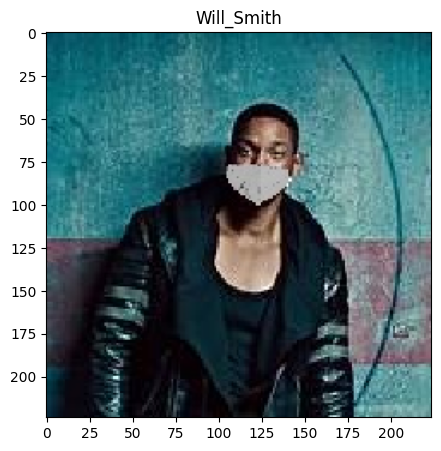

In [83]:
############################
### TEST MULTIPLE IMAGES ###
############################
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_data_dir = '../converging_models/converge_testing/test_mixed/'
test_datagen = ImageDataGenerator()
Test_data = test_datagen.flow_from_directory(
                        test_data_dir,
                        batch_size = 1,
                        target_size=(224,224),
                        shuffle = False) 

#Confusion Matrix 
plt.figure(figsize=(15, 5))
for i in range (100): 
    for celeb in Test_data[i][0]:

        resizedCeleb = celeb/255
        plt.imshow(resizedCeleb, cmap='gray')
        ###

        x = img_to_array(celeb)
        x = np.expand_dims(celeb, axis=0)
        x = preprocess_input(x)

        prediction = masked_model.predict(x)
        print(names[np.argmax(prediction, axis=1)[0]])

        ###
        plt.title(names[np.argmax(prediction, axis=1)[0]])

        

    

#Predict test images
#print(mask_no_mask_model.predict(Test_data))

# #Get corresponding predicted label
# y_pred = np.argmax(Y_pred, axis=1)

# cf = confusion_matrix(Test_data.classes, y_pred)


# df_cm = pd.DataFrame(cf, index=categories, columns=categories)

# sns.heatmap(df_cm, annot= True,fmt="d",cmap="YlGnBu")
# plt.ylabel("Predicted")
# plt.xlabel("Actual")
# plt.title("Confusion matrix\n")
# plt.show()


Found 680 images belonging to 17 classes.
22/22 [==============================] - 2s 74ms/step


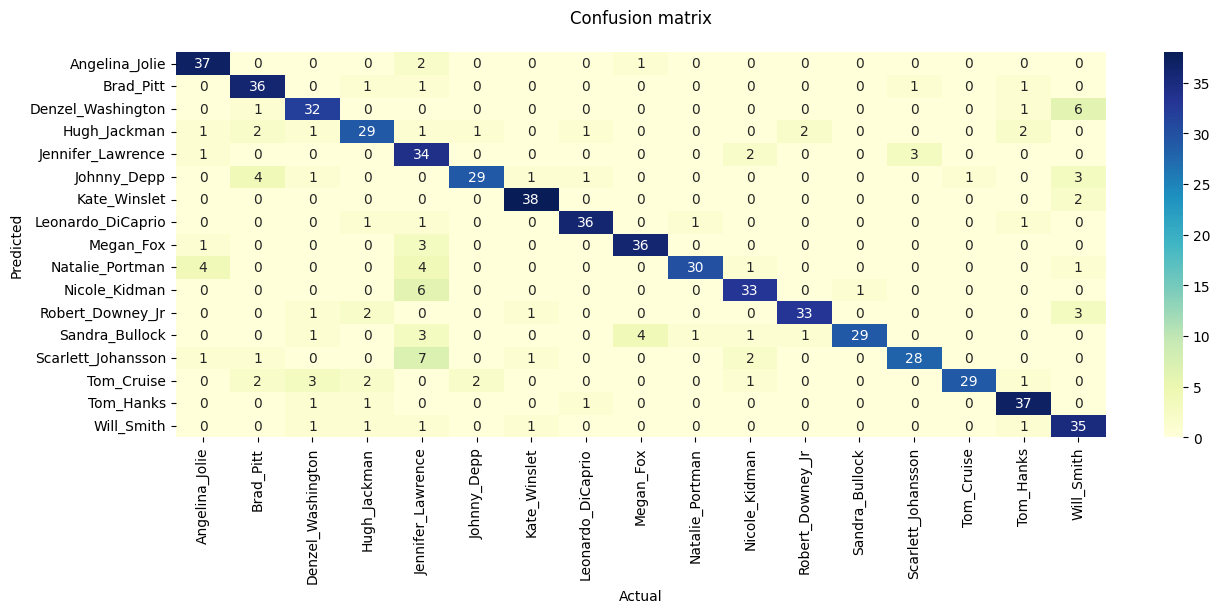

In [96]:
test_data_dir = '../converging_models/converge_testing/test_mixed/'
test_datagen = ImageDataGenerator(
                                 )
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(224,224),
                        batch_size=32, 
                        shuffle = False,
                        class_mode='sparse') 

#Confusion Matrix 
plt.figure(figsize=(15, 5))

#Predict test images
Y_pred = masked_model.predict(test_generator)

#Get corresponding predicted label
y_pred = np.argmax(Y_pred, axis=1)

cf = confusion_matrix(test_generator.classes, y_pred)

df_cm = pd.DataFrame(cf, index=names, columns=names)

sns.heatmap(df_cm, annot= True,fmt="d",cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title("Confusion matrix\n")
plt.show()

In [101]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()

predictionLabel = ''
boxColor = (0,0,0)

video = cv2.VideoCapture(0)
#video = cv2.VideoCapture("../Dataset/Video1.mp4")


if (video.isOpened() == False):
    print("Web Camera not detected")
while (True):
    ret, frame = video.read()
    if ret == True:
        location = detector.detect_faces(frame)
        if len(location) > 0:
            for face in location:
                x_point, y_point, width, height = face['box']
                x2_point, y2_point = x_point + width, y_point + height

                ###
                new_frame = cv2.resize(frame, (224,224))
                x = image.img_to_array(new_frame)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)

                prediction = mask_no_mask_model.predict(x)

                if mask_label[np.argmax(prediction, axis=1)[0]] == 'with mask':
                    predictionLabel = 'Masked - '
                    prediction = masked_model.predict(x)
                    boxColor = (255,0,0)
                else:
                    predictionLabel = 'Unmasked - '
                    prediction = unmasked_model.predict(x)
                    boxColor = (0,0,255)

                predictionLabel = predictionLabel + names[np.argmax(prediction, axis=1)[0]]
                ###
                cv2.rectangle(frame, (x_point - 10, y_point - 50), (x2_point + 10, y2_point + 50), boxColor, 2)
                cv2.rectangle(frame, (x_point - 11, y_point - 49), (x2_point + 11, y_point - 24), boxColor, cv2.FILLED)
                font = cv2.FONT_HERSHEY_DUPLEX
                cv2.putText(frame, predictionLabel, (x_point - 6, y_point - 36), font, 0.5, (255, 255, 255), 1)

        cv2.imshow("Output",frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()

In [106]:
video_capture = cv2.VideoCapture(0)
#video_capture = cv2.VideoCapture("../Dataset/Video1.mp4")

# Initialize some variables
face_locations = []
process_this_frame = True
predictionLabel = ''
boxColor = (0,0,0)

while True:
    ret, frame = video_capture.read()

    if process_this_frame:
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
        rgb_small_frame = small_frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_small_frame)
        
        new_frame = cv2.resize(frame, (224,224))
        x = image.img_to_array(new_frame)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        prediction = mask_no_mask_model.predict(x)

        if mask_label[np.argmax(prediction, axis=1)[0]] == 'with mask':
            predictionLabel = 'Masked - '
            prediction = masked_model.predict(x)
            boxColor = (255,0,0)
        else:
            predictionLabel = 'Unmasked - '
            prediction = unmasked_model.predict(x)
            boxColor = (0,0,255)

        predictionLabel = predictionLabel + names[np.argmax(prediction, axis=1)[0]]
        ###

        

    #process_this_frame = not process_this_frame


    for (top, right, bottom, left) in face_locations:
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        cv2.rectangle(frame, (left - 10, top - 50), (right + 10, bottom + 50), boxColor, 2)
        cv2.rectangle(frame, (left - 11, top - 49), (right + 11, top -24), boxColor, cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, predictionLabel, (left - 6, top - 36), font, 0.5, (255, 255, 255), 1)

    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 62ms/step
